<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/German_Traffic_Signs_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing import image
from PIL import Image
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
from tqdm import tqdm
import time as t

for i in tqdm(range(100)):
    t.sleep(0.1)

100%|██████████| 100/100 [00:10<00:00,  9.81it/s]


In [5]:
local_path='datasets/german_signs'
remote_path='https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/07_Computer_Vision_Image_Classification/datasets/german_signs/'

!rm -rf ./$local_path

!wget -q --directory-prefix=$local_path $remote_path/Meta.csv
!wget -q --directory-prefix=$local_path $remote_path/Meta.zip
!wget -q --directory-prefix=$local_path $remote_path/Test.csv
!wget -q --directory-prefix=$local_path $remote_path/Test.zip
!wget -q --directory-prefix=$local_path $remote_path/Train.csv
!wget -q --directory-prefix=$local_path $remote_path/Train_1.zip
!wget -q --directory-prefix=$local_path $remote_path/Train_2.zip
!wget -q --directory-prefix=$local_path $remote_path/Train_3.zip
!wget -q --directory-prefix=$local_path $remote_path/pred.csv

In [6]:
!rm -rf ./Meta
!rm -rf ./Test
!rm -rf ./Train

In [7]:
!unzip -q $local_path/Meta.zip
!unzip -q $local_path/Test.zip
!unzip -q $local_path/Train_1.zip
!unzip -q $local_path/Train_2.zip
!unzip -q $local_path/Train_3.zip

In [8]:
!mv datasets/german_signs/Meta.csv .
!mv datasets/german_signs/Test.csv .
!mv datasets/german_signs/Train.csv .
!mv datasets/german_signs/pred.csv .

In [9]:
# the CSV files contain some information about the data, let's inspect them
train_df = pd.read_csv('Train.csv')

In [10]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [11]:
len(train_df)

39209

In [12]:
# loading input images
train_image = []

for i in tqdm(range(train_df.shape[0])):
    path = train_df['Path'][i] # obtain the path
    # print(path)
    # break
    img = image.load_img(path, target_size=(28,28,3)) # load and transform w/ keras.preprocessing 
    img = image.img_to_array(img)
    img = img/255 # scale images to 0-255
    train_image.append(img)
    
X = np.array(train_image)

100%|██████████| 39209/39209 [00:26<00:00, 1472.27it/s]


In [15]:
# target
y = train_df['ClassId'].values
print(y)
# one-hot encoding from keras.utils. Othervise error will be thrown: 
# ... ValueError: Shapes (None, 1) and (None, 43) are incompatible
y = to_categorical(y)
pd.DataFrame(y)

[20 20 20 ... 42 42 42]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Train/41/00041_00002_00009.png


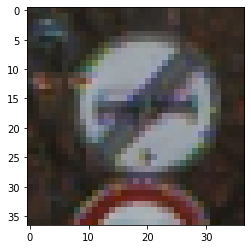

In [16]:
img_num = 38798
img = plt.imread(train_df["Path"][img_num])
plt.imshow(img)
print(train_df["Path"][img_num])

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
# model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', 'precision']) # incorrect passing of precision
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', tf.keras.metrics.Precision()])

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
981/981 [==============================] - 117s 118ms/step - loss: 0.6608 - accuracy: 0.8281 - precision: 0.9457 - val_loss: 0.1471 - val_accuracy: 0.9583 - val_precision: 0.9710
Epoch 2/10
981/981 [==============================] - 103s 105ms/step - loss: 0.1016 - accuracy: 0.9723 - precision: 0.9796 - val_loss: 0.1099 - val_accuracy: 0.9718 - val_precision: 0.9796
Epoch 3/10
981/981 [==============================] - 88s 90ms/step - loss: 0.0536 - accuracy: 0.9857 - precision: 0.9884 - val_loss: 0.1110 - val_accuracy: 0.9707 - val_precision: 0.9754
Epoch 4/10
981/981 [==============================] - 91s 93ms/step - loss: 0.0350 - accuracy: 0.9904 - precision: 0.9919 - val_loss: 0.0745 - val_accuracy: 0.9796 - val_precision: 0.9831
Epoch 5/10
981/981 [==============================] - 87s 89ms/step - loss: 0.0285 - accuracy: 0.9922 - precision: 0.9934 - val_loss: 0.0587 - val_accuracy: 0.9846 - val_precision: 0.9863
Epoch 6/10
981/981 [==============================] - 87

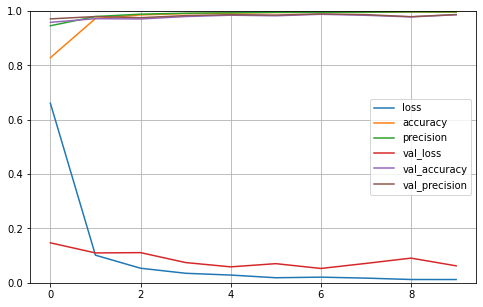

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
test_df = pd.read_csv('Test.csv')

In [25]:
test_image = []

for i in tqdm(range(test_df.shape[0])):
    img = image.load_img(test_df['Path'][i], target_size=(28,28,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

100%|██████████| 12630/12630 [00:07<00:00, 1653.12it/s]


In [26]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [27]:
test_paths = test_df["Path"]

In [28]:
y_test = test_df['ClassId'].values
y_test = to_categorical(y_test)

In [29]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 9s 22ms/step - loss: 0.3472 - accuracy: 0.9392 - precision: 0.9434


[0.3471880853176117, 0.9391924142837524, 0.9433901906013489]

In [31]:
history = model.fit(X, y, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1226/1226 [==============================] - 113s 92ms/step - loss: 0.0107 - accuracy: 0.9968 - precision: 0.9971 - val_loss: 0.2493 - val_accuracy: 0.9492 - val_precision: 0.9573
Epoch 2/2
1226/1226 [==============================] - 115s 94ms/step - loss: 0.0090 - accuracy: 0.9977 - precision: 0.9978 - val_loss: 0.3760 - val_accuracy: 0.9419 - val_precision: 0.9443


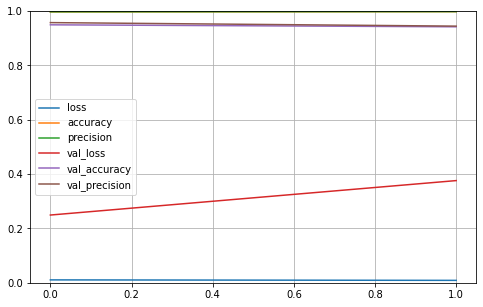

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
# prediction = model.predict_classes(X_test) # old way
prediction = np.argmax(model.predict(X_test), axis=-1) # new way

In [34]:
# creating prediction file
pred_df = pd.DataFrame()
pred_df["Img_Path"] = test_paths
pred_df["Prediction"] = prediction
pred_df.to_csv('pred.csv', header=True, index=False)

In [35]:
pred = pd.read_csv("pred.csv")
pred.head()

,Img_Path,Prediction
0,Test/00000.png,16
1,Test/00001.png,1
2,Test/00002.png,38
3,Test/00003.png,33
4,Test/00004.png,11


The actual class is : 14
The predicted class is : 14


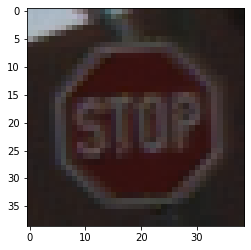

In [36]:
img_num = 8477
img = plt.imread(test_df["Path"][img_num])
plt.imshow(img)

print("The actual class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred_df["Prediction"][img_num] )